**Library to track time**

In [ ]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.1 MB/s 


In [ ]:
%load_ext autotime

time: 815 µs (started: 2022-08-23 20:45:13 +00:00)


**Divide & Conqur**

In [ ]:
from math import sqrt, floor
import numpy as np

def naive_sharding(ds, k):

    n = np.shape(ds)[1]
    m = np.shape(ds)[0]
    centroids = np.mat(np.zeros((k,n)))

    composite = np.mat(np.sum(ds, axis=1))
    ds = np.append(composite.T, ds, axis=1)
    ds.sort(axis=0)

    
    step = floor(m/k)

    
    vfunc = np.vectorize(_get_mean)

    for j in range(k):
        if j == k-1:
            centroids[j:] = vfunc(np.sum(ds[j*step:,1:], axis=0), step)
        else:
            centroids[j:] = vfunc(np.sum(ds[j*step:(j+1)*step,1:], axis=0), step)

    return centroids

def _get_mean(sums, step):
    return sums/step

time: 3.56 ms (started: 2022-08-23 20:45:16 +00:00)


**Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

time: 1 s (started: 2022-08-23 20:45:20 +00:00)


**Data Load**

In [ ]:
df = pd.read_csv("https://github.com/sumit07041997/Thesis/blob/f748d943eb374bfd612445cce826f3809f11fcf4/Breast%20Cancer.csv?raw=true")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


time: 1.3 s (started: 2022-08-23 20:48:33 +00:00)


**Check for null values**

In [ ]:
print(df.isnull().values.any())

False
time: 2.25 ms (started: 2022-07-29 08:00:07 +00:00)


**No. of Classes & its Count**

In [ ]:
lable = df['diagnosis'].copy()
data = df.drop('diagnosis',axis=1)
data = data.drop('id',axis=1)
lable.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

time: 8.66 ms (started: 2022-07-29 08:00:09 +00:00)


**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data= scaler.fit_transform(data)

time: 5.7 ms (started: 2022-07-29 08:00:12 +00:00)


**Elbow Method**

1. Using Distortion 
- Computes the sum of squared distances from each point to its assigned center.



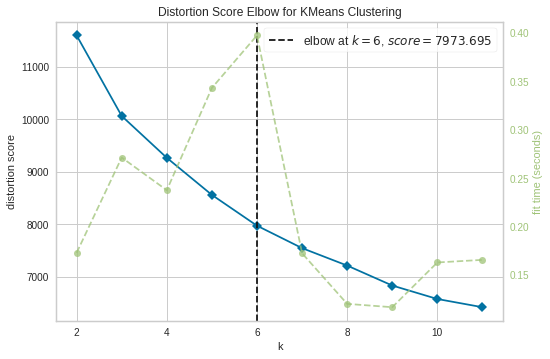

time: 2.43 s (started: 2022-07-29 08:01:38 +00:00)


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='distortion'
)
visualizer.fit(data)        
visualizer.show() 

# 2. Silhouette score 


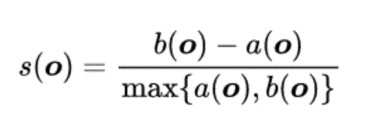

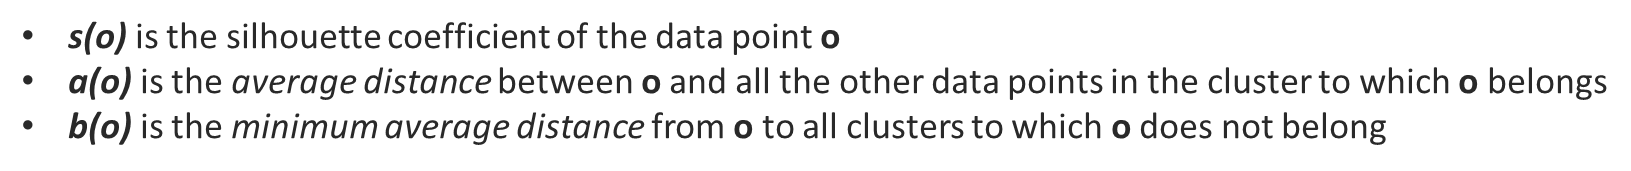

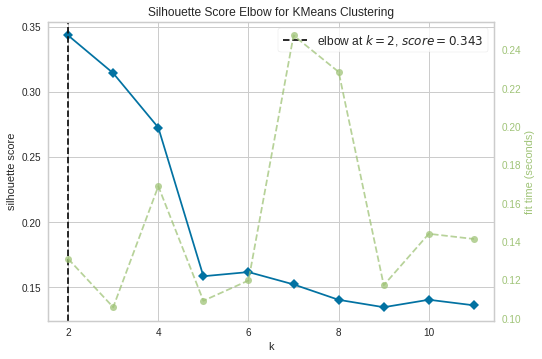

time: 1.89 s (started: 2022-07-29 08:02:13 +00:00)


In [ ]:
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette')
visualizer.fit(data) 
visualizer.show() 


3. calinski_harabasz score 
- computes the ratio of dispersion between and within clusters.

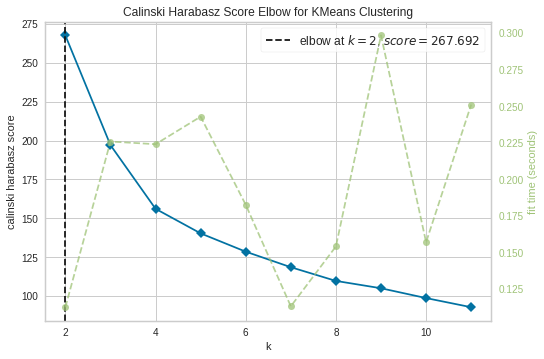

time: 2.24 s (started: 2022-07-29 08:02:40 +00:00)


In [ ]:
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz')
visualizer.fit(data) 
visualizer.show()

Time comparison on K-means++, random & divide

In [ ]:
kmeans = KMeans(n_clusters=2,init='random', random_state=0).fit(data)
print('Iterations: ',kmeans.n_iter_)


Iterations:  8
time: 27.8 ms (started: 2022-07-29 08:16:50 +00:00)


In [ ]:
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0).fit(data)
print('Iterations: ',kmeans.n_iter_)

Iterations:  5
time: 152 ms (started: 2022-07-29 08:16:53 +00:00)


In [ ]:
kmeans = KMeans(n_clusters=2,init=naive_sharding(data,2), random_state=0).fit(data)
print('Iterations: ',kmeans.n_iter_)

Iterations:  6
time: 9.15 ms (started: 2022-07-29 08:16:57 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


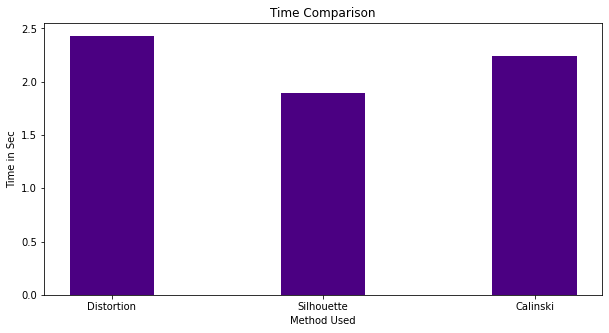

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 

method = ['Distortion','Silhouette','Calinski']
time = [2.43,1.89,2.24]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(method, time, color ='indigo',
        width = 0.4)
 
plt.xlabel("Method Used")
plt.ylabel("Time in Sec")
plt.title("Time Comparison")
plt.show()